Importing Libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

Data Processing

Training Image Preprocessing 

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    data_format=None,
)

Found 33111 files belonging to 41 classes.


Validation Image Preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    data_format=None,
)

Found 8339 files belonging to 41 classes.


In [46]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 41), dtype=tf.float32, name=None))>

In [47]:
validation_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 41), dtype=tf.float32, name=None))>

In [48]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[128.   112.   123.  ]
   [134.75 118.75 129.75]
   [131.5  115.5  126.5 ]
   ...
   [130.75 114.75 125.75]
   [130.5  114.5  125.5 ]
   [135.5  119.5  130.5 ]]

  [[134.5  118.5  129.5 ]
   [132.5  116.5  127.5 ]
   [131.   115.   126.  ]
   ...
   [139.   123.   134.  ]
   [139.   123.   134.  ]
   [136.75 120.75 131.75]]

  [[130.5  114.5  125.5 ]
   [124.   108.   119.  ]
   [117.75 101.75 112.75]
   ...
   [142.5  126.5  137.5 ]
   [147.25 131.25 142.25]
   [146.   130.   141.  ]]

  ...

  [[149.75 137.75 147.75]
   [156.75 144.75 154.75]
   [174.   162.   172.  ]
   ...
   [155.25 143.25 157.25]
   [164.   152.   166.  ]
   [170.5  158.5  172.5 ]]

  [[143.25 131.25 141.25]
   [149.5  137.5  147.5 ]
   [155.   143.   153.  ]
   ...
   [170.   158.   172.  ]
   [131.5  119.5  133.5 ]
   [139.75 127.75 141.75]]

  [[147.   135.   145.  ]
   [152.   140.   150.  ]
   [140.   128.   138.  ]
   ...
   [158.25 146.25 160.25]
   [152.   140.   154.  ]
   [134.25 122.25 13

Building Model

In [49]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model

In [50]:
model = Sequential()

Building Convolution layer

In [51]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [52]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [53]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [54]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [55]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [56]:
model.add(Dropout(0.25))#to avoid overfitting

In [57]:
model.add(Flatten())

In [58]:
model.add(Dense(units=1500,activation='relu'))

In [59]:
model.add(Dropout(0.4))

Output layer

In [60]:
model.add(Dense(units=41,activation='softmax'))

Compile Model

In [61]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [65]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 41)                  │          61,541 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,541,797 (89.80 MB)

 Trainable params: 7,847,265 (29.93 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,694,532 (59.87 MB)

Model Training

In [62]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 1119s 1s/step - accuracy: 0.3769 - loss: 2.3233 - val_accuracy: 0.7524 - val_loss: 0.7855
Epoch 2/10
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 980s 946ms/step - accuracy: 0.7485 - loss: 0.7935 - val_accuracy: 0.8273 - val_loss: 0.5474
Epoch 3/10
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 981s 947ms/step - accuracy: 0.8414 - loss: 0.5012 - val_accuracy: 0.8809 - val_loss: 0.3496
Epoch 4/10
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 957s 924ms/step - accuracy: 0.8857 - loss: 0.3500 - val_accuracy: 0.8988 - val_loss: 0.3017
Epoch 5/10
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 965s 931ms/step - accuracy: 0.9142 - loss: 0.2602 - val_accuracy: 0.8836 - val_loss: 0.3437
Epoch 6/10
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 930s 898ms/step - accuracy: 0.9336 - loss: 0.2094 - val_accuracy: 0.8941 - val_loss: 0.3333
Epoch 7/10
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 951s 918ms/step - accuracy: 0.9450 - loss: 0.1639 - val_accuracy: 0.9123 - val_loss: 0.3080
Epoch 8/10
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 1340s 1s/step - accura

Model Evaluation

In [64]:
## model evaluation on training set
train_loss,train_acc = model.evaluate(training_set)

1035/1035 ━━━━━━━━━━━━━━━━━━━━ 443s 427ms/step - accuracy: 0.9793 - loss: 0.0593


In [66]:
print(train_loss,train_acc)

0.052617527544498444 0.9819395542144775


In [67]:
##model on validation set
val_loss,val_acc = model.evaluate(validation_set)

261/261 ━━━━━━━━━━━━━━━━━━━━ 115s 438ms/step - accuracy: 0.9206 - loss: 0.3041


In [68]:
print(val_loss,val_acc)

0.3029601275920868 0.9218131899833679


Saving Model

In [69]:
model.save("trained_model.keras")

In [70]:
training_history.history

{'accuracy': [0.5403038263320923,
  0.7759354710578918,
  0.8528887629508972,
  0.8924224376678467,
  0.9155265688896179,
  0.9371809959411621,
  0.9465132355690002,
  0.9565401077270508,
  0.9639394879341125,
  0.9686508774757385],
 'loss': [1.6253682374954224,
  0.706164538860321,
  0.46169355511665344,
  0.3304997384548187,
  0.2532671093940735,
  0.19339129328727722,
  0.16050374507904053,
  0.1262330710887909,
  0.10860704630613327,
  0.09251799434423447],
 'val_accuracy': [0.7523683905601501,
  0.8273174166679382,
  0.880920946598053,
  0.8987888097763062,
  0.8835591673851013,
  0.8941119909286499,
  0.9123396277427673,
  0.9220529794692993,
  0.9194148182868958,
  0.9218131899833679],
 'val_loss': [0.7855314612388611,
  0.5474184155464172,
  0.34963458776474,
  0.30170854926109314,
  0.3437272310256958,
  0.33334824442863464,
  0.308013916015625,
  0.29162776470184326,
  0.2926291823387146,
  0.3027101159095764]}

Recording history in JSON

In [71]:
import json 
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

Accuracy Visualization

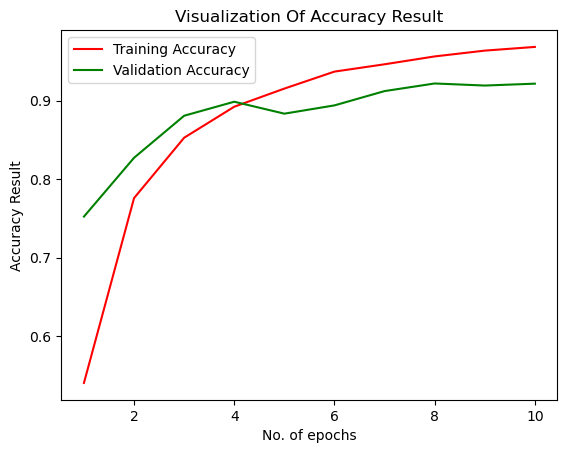

In [72]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization Of Accuracy Result")
plt.legend()
plt.show()

Some other metrics for model evaluation 

In [5]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Chili__healthy',
 'Chili__leaf curl',
 'Chili__leaf spot',
 'Chili__whitefly',
 'Chili__yellowish',
 'Coffee__Rust',
 'Coffee__healthy',
 'Coffee__red spider mite',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___S

In [74]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    data_format=None,
)

Found 8339 files belonging to 41 classes.


In [75]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

261/261 ━━━━━━━━━━━━━━━━━━━━ 117s 447ms/step


(array([[9.9998653e-01, 1.1024519e-10, 2.2869794e-12, ..., 3.6836444e-13,
         1.8555105e-12, 3.4019656e-12],
        [9.3506581e-01, 1.4154183e-05, 4.1968042e-06, ..., 3.4839712e-08,
         1.5244021e-08, 3.9155993e-06],
        [9.8959219e-01, 1.5102424e-09, 3.8908343e-10, ..., 2.0027525e-11,
         9.5431926e-12, 2.5770955e-10],
        ...,
        [6.1033713e-11, 7.8649375e-13, 4.7845028e-10, ..., 3.7265972e-12,
         2.8312036e-12, 9.9998987e-01],
        [1.2785461e-11, 1.0832590e-13, 2.0396437e-13, ..., 6.3459291e-13,
         3.9806240e-12, 9.9999785e-01],
        [1.4773065e-13, 8.5389070e-15, 6.3966905e-14, ..., 1.3396874e-13,
         1.4785868e-12, 9.9999869e-01]], dtype=float32),
 (8339, 41))

In [76]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [77]:
predicted_categories

<tf.Tensor: shape=(8339,), dtype=int64, numpy=array([ 0,  0,  0, ..., 40, 40, 40], dtype=int64)>

In [78]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(8339, 41), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [79]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(8339,), dtype=int64, numpy=array([ 0,  0,  0, ..., 40, 40, 40], dtype=int64)>

In [80]:
from sklearn.metrics import classification_report,confusion_matrix

In [81]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.84      0.90       126
                                 Apple___Black_rot       0.96      0.97      0.96       124
                          Apple___Cedar_apple_rust       0.92      0.84      0.88        55
                                   Apple___healthy       0.94      0.97      0.95       329
          Cherry_(including_sour)___Powdery_mildew       0.96      0.94      0.95       210
                 Cherry_(including_sour)___healthy       0.98      0.96      0.97       170
                                    Chili__healthy       0.50      0.60      0.55        10
                                  Chili__leaf curl       0.23      0.80      0.36        10
                                  Chili__leaf spot       0.60      0.30      0.40        10
                                   Chili__whitefly       1.00      0.60      0.

In [82]:
cn = confusion_matrix(Y_true,predicted_categories)
cn.shape

(41, 41)

In [83]:
cn = confusion_matrix(Y_true,predicted_categories)
cn

array([[ 106,    1,    0, ...,    0,    0,    0],
       [   0,  120,    0, ...,    0,    0,    0],
       [   0,    0,   46, ...,    1,    0,    0],
       ...,
       [   0,    0,    0, ..., 1051,    0,    0],
       [   0,    0,    0, ...,    0,   73,    0],
       [   0,    0,    0, ...,    0,    0,  318]], dtype=int64)

Confusion Matrix Visualization

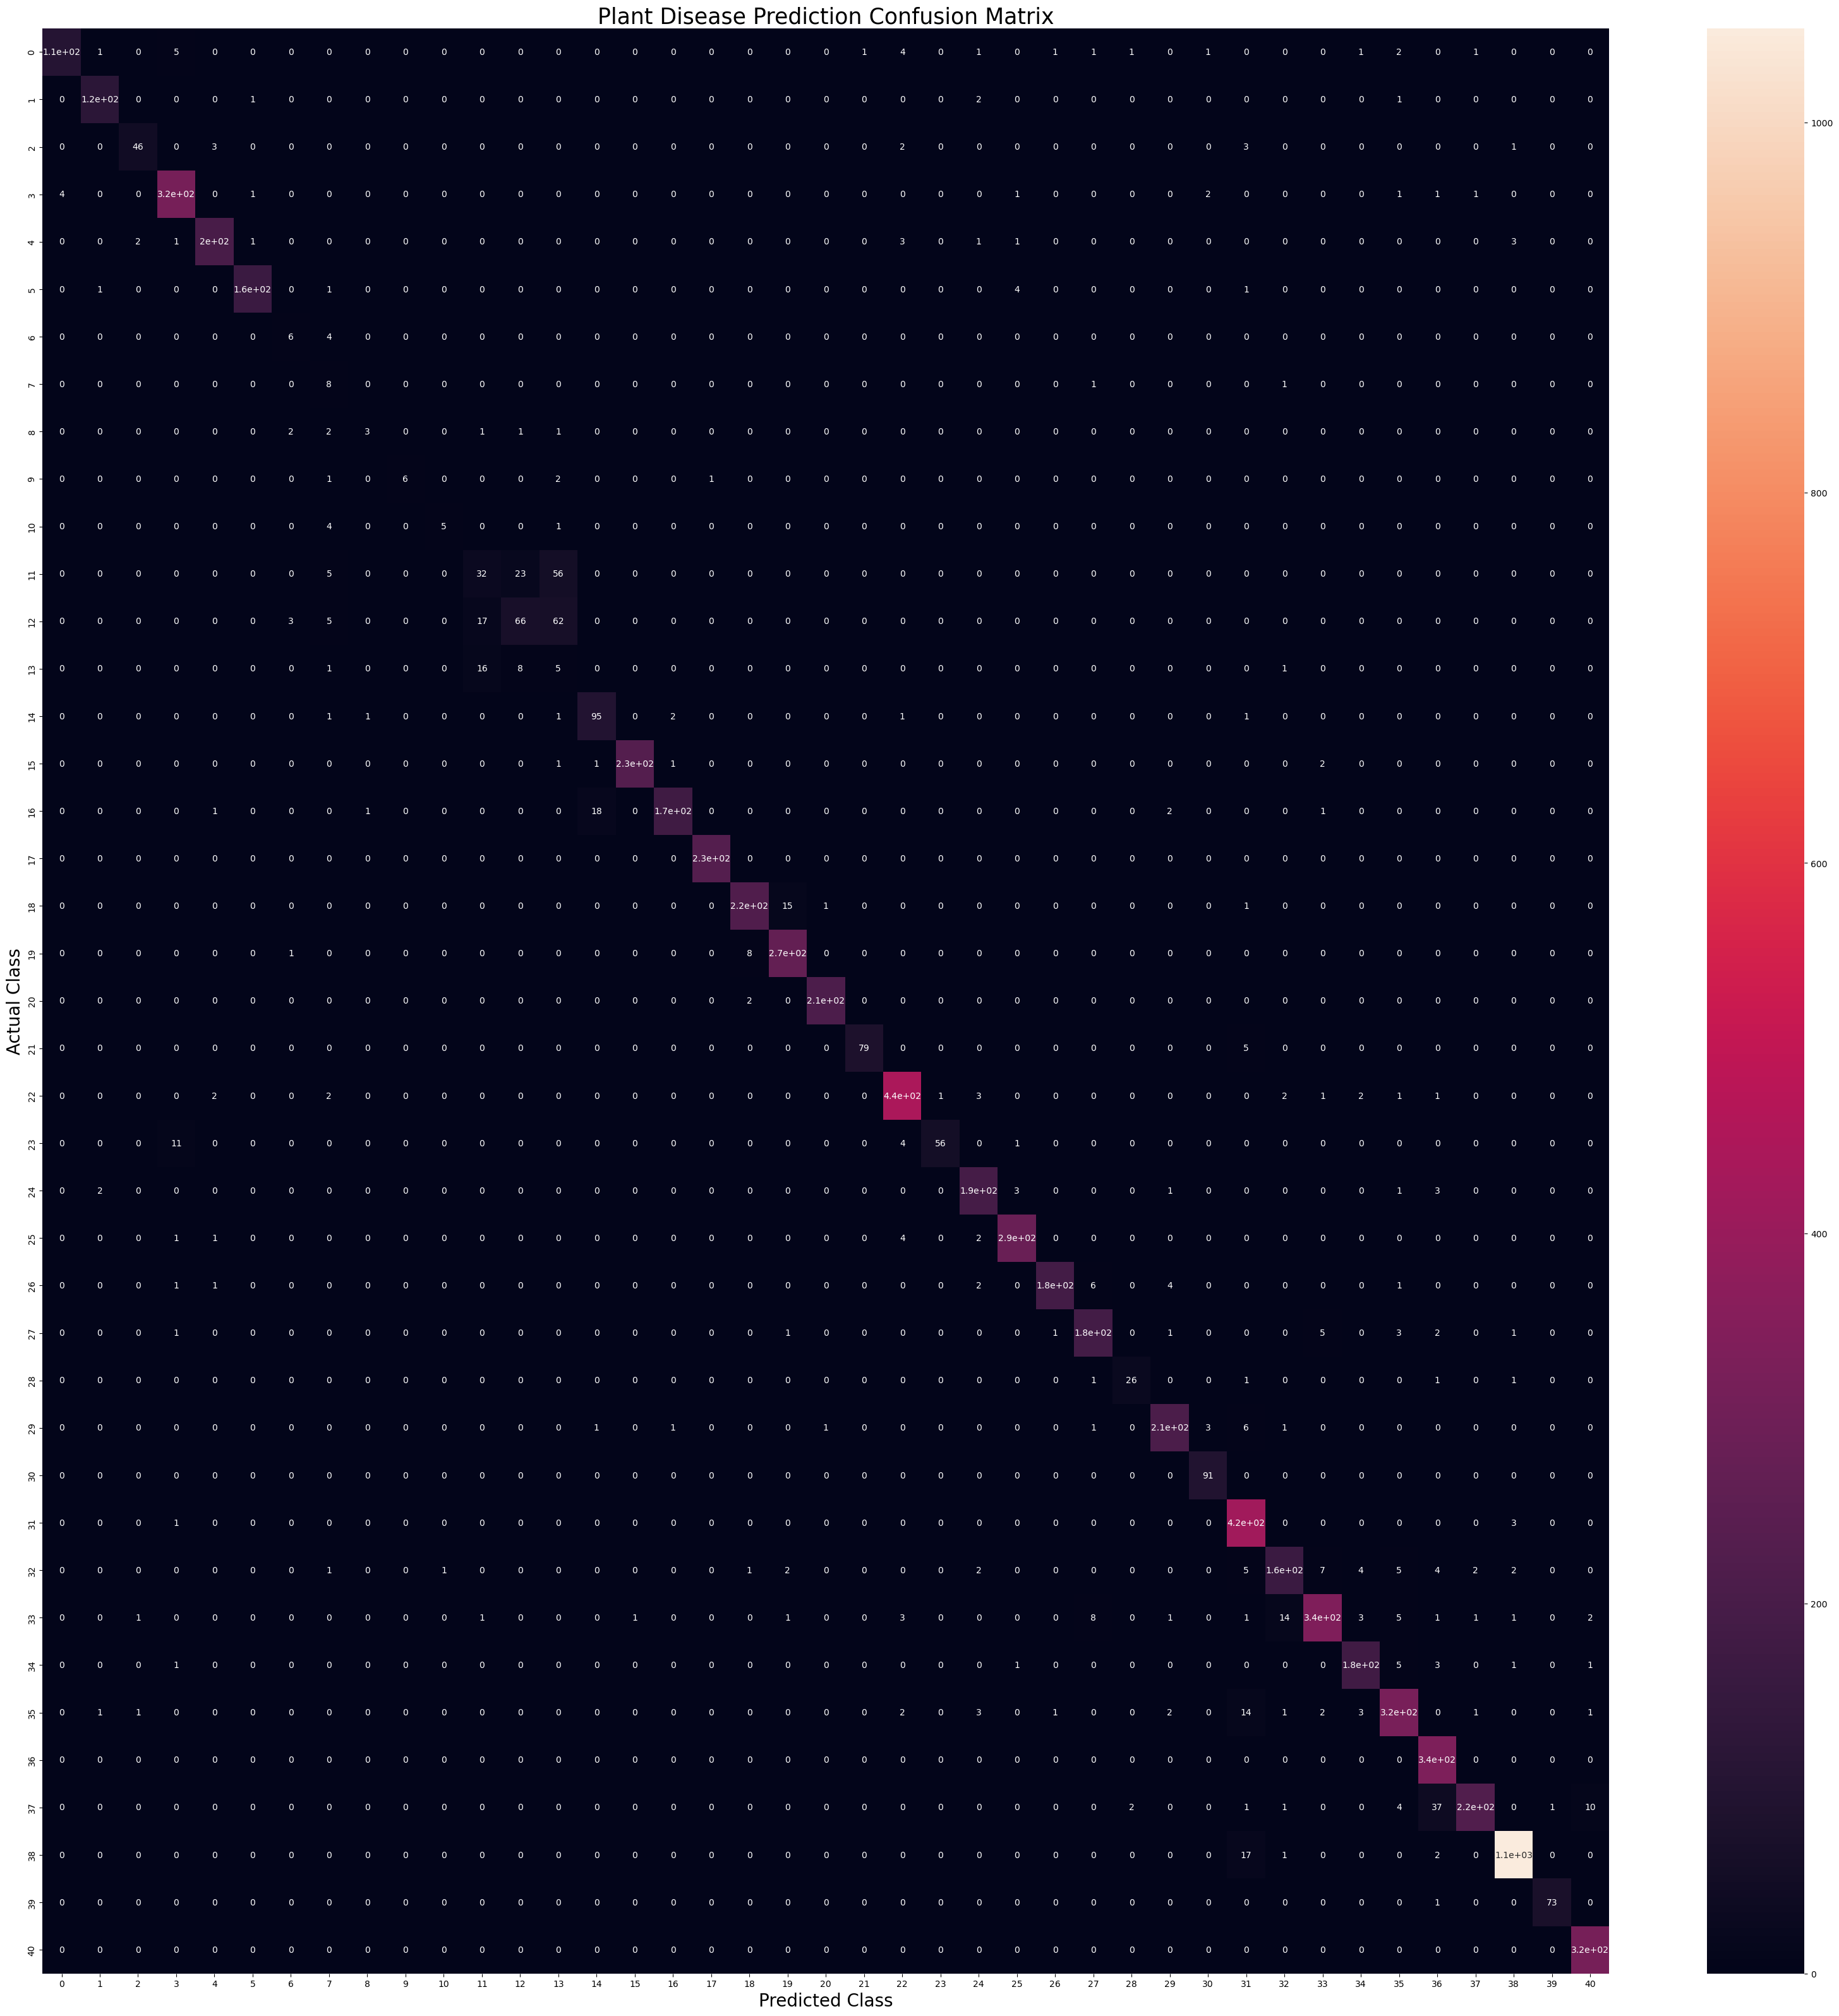

In [93]:
plt.figure(figsize=(40,40))
sns.heatmap(cn,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()